In [4]:
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# type1:
## cout: (500 + 1.1 * distance + 1.1 * 8 + 1.3 * 16) * nb_type1
# type2:
## cout: (800 + 1.3 * distance + 1.3 * 8 + 1.5 * 16) * nb_type2

def cout(distance, nb_type1, nb_type2):
    c = np.array([500 + 1.1 * distance + 1.1 * 8 + 1.3 * 16,
                  800 + 1.3 * distance + 1.3 * 8 + 1.5 * 16])
    A_eq = np.array([[10 * 24,20*24],[10*24,20*24]])
    b_eq = np.array([distance, distance])
    bounds = [(0, nb_type1), (0, nb_type2)]
    
    res = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method="highs")
    return res.fun, res.lower.residual

In [16]:
print("(Cout, flotte optimale)")
print(cout(6349.38,30,0)) # uniquement des typeI
print(cout(6349.38, 10, 20)) # des typeI et des typeII

(Cout, flotte optimale)
(198786.33612850006, array([26.45575,  0.     ]))
(120222.78535775002, array([ 0.      , 13.227875]))


In [13]:
def plot(x,y,z):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x,y,z)
    plt.show()

def visualisation(distance):
    x_type1, x_type2 = np.arange(50), np.arange(50)
    x,y,z = [],[],[]
    for type1 in x_type1:
        for type2 in x_type2:
            cost,_ = cout(distance, type1, type2)
            if cost == None:
                continue
            x.append(type1)
            y.append(type2)
            z.append(cost)
    plot(x,y,z)

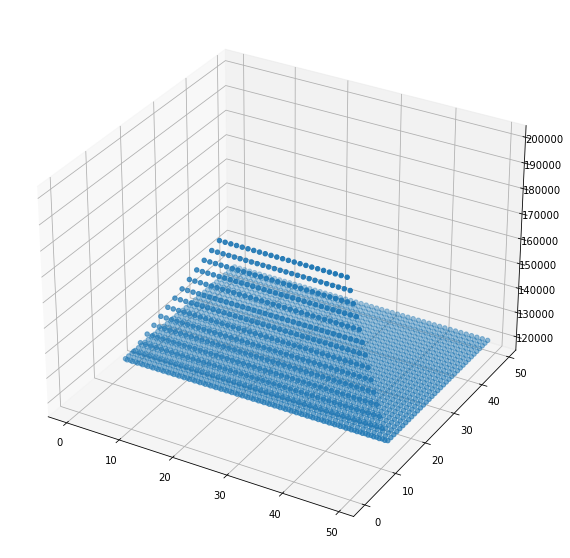

In [14]:
visualisation(6349.38)